# Breast-Cancer Detection using 1D Convolutional Neural Network With Intersection Over Union Technologie


1. Keep Your Code Clean With Comment And Suggestion
2. Do Not Modify Other Team Member Code


#### Link That are going to help
1. https://pytorch.org/hub/ultralytics_yolov5/
2. https://www.mdpi.com/2075-4418/13/19/3113
3. https://docs.ultralytics.com/tasks/segment/
4. https://www.timeshighereducation.com/campus/diy-guide-starting-your-own-journal
5. https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images

### Anything Not Clear , Contact Me 🐱

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.7/793.7 kB 11.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
# https://www.kaggle.com/datasets/debjeetdas/breast-cancer-jpg-image-dataset-of-cbisddsm/data
!kaggle datasets download -d debjeetdas/breast-cancer-jpg-image-dataset-of-cbisddsm -p /content/drive/MyDrive

Dataset URL: https://www.kaggle.com/datasets/debjeetdas/breast-cancer-jpg-image-dataset-of-cbisddsm
License(s): CC0-1.0
100% 1.54G/1.54G [01:22<00:00, 16.2MB/s]
100% 1.54G/1.54G [01:22<00:00, 19.9MB/s]


In [ ]:
%cd /content/drive/MyDrive/train

/content/drive/MyDrive/train


In [ ]:
# prompt: unzip the following folder breast-cancer-jpg-image-dataset-of-cbisddsm.zip in dataset/
!unzip breast-cancer-jpg-image-dataset-of-cbisddsm.zip -d dataset/

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: dataset/k_CBIS-DDSM/jpg_img/Calc_Training_P_02566_RIGHT_MLO_1-1.3.6.1.4.1.9590.100.1.2.409665595112151148017635992810165862184-1.3.6.1.4.1.9590.100.1.2.126466180112225633704342944283406889296/ROI-mask-images-img_1-2.jpg  
  inflating: dataset/k_CBIS-DDSM/jpg_img/Calc_Training_P_02572_LEFT_CC-1.3.6.1.4.1.9590.100.1.2.202182547311532559519586953161595371087-1.3.6.1.4.1.9590.100.1.2.398227953312611741920008201231762883907/full-mammogram-images-img_0-1.jpg  
  inflating: dataset/k_CBIS-DDSM/jpg_img/Calc_Training_P_02572_LEFT_CC_1-1.3.6.1.4.1.9590.100.1.2.395804881613761214305975523192043590086-1.3.6.1.4.1.9590.100.1.2.144395473912570122935524374263096844809/ROI-mask-images-img_0-2.jpg  
  inflating: dataset/k_CBIS-DDSM/jpg_img/Calc_Training_P_02572_LEFT_CC_1-1.3.6.1.4.1.9590.100.1.2.395804881613761214305975523192043590086-1.3.6.1.4.1.9590.100.1.2.144395473912570122935524374263096844809/ROI-mask-image

In [ ]:
# Import the needed library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import os

In [ ]:
# Import necessary libraries
import torch
from ultralytics import YOLO
from PIL import Image
from torchvision import transforms, datasets
from torch.utils.data import DataLoader , Dataset

In [ ]:
# Paths to the dataset directories
base_dir = 'dataset/k_CBIS-DDSM/'
csv_file = os.path.join(base_dir, 'calc_case(with_jpg_img).csv')

In [ ]:
# Output directories
output_image_dir = 'Images'
output_label_dir = 'Labels'

In [ ]:
# Create output directories if they do not exist
os.makedirs(output_image_dir, exist_ok=True)
os.makedirs(output_label_dir, exist_ok=True)

In [ ]:
# Load the CSV file
df = pd.read_csv(csv_file)

In [ ]:
# Limit to 200 images
df = df.head(1)

In [ ]:
df.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,jpg_fullMammo_img_path,jpg_crop_img_path,jpg_ROI_img_path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,jpg_img/Calc_Training_P_00005_RIGHT_CC-1.3.6.1...,jpg_img/Calc_Training_P_00005_RIGHT_CC_1-1.3.6...,jpg_img/Calc_Training_P_00005_RIGHT_CC_1-1.3.6...


In [ ]:
def process_annotations(row):
    # Assuming annotations are in the CSV file and the ROI mask is a binary mask
    # For this example, we use placeholder values for annotations
    class_id = 0  # Example class ID
    x_center, y_center, width, height = 0.5, 0.5, 0.5, 0.5  # Placeholder values
    return f"{class_id} {x_center} {y_center} {width} {height}\n"

In [ ]:
for idx, row in df.iterrows():
  print(row['jpg_ROI_img_path'])
  print(row['jpg_crop_img_path'])

jpg_img/Calc_Training_P_00005_RIGHT_CC_1-1.3.6.1.4.1.9590.100.1.2.328778919012412769218080124214088709081-1.3.6.1.4.1.9590.100.1.2.47414316010368386519740343172775938548/ROI-mask-images-img_1-2.jpg
jpg_img/Calc_Training_P_00005_RIGHT_CC_1-1.3.6.1.4.1.9590.100.1.2.328778919012412769218080124214088709081-1.3.6.1.4.1.9590.100.1.2.47414316010368386519740343172775938548/ROI-mask-images-img_0-2.jpg


In [ ]:
# prompt: use this loop for idx, row in df.iterrows():
# on row['jpg_ROI_img_path']
# each time get the last text after / "its going to be ROI-mask-images-img_1-2.jpg"
# transfer it into cropped-images-img_0-2.jpg

for idx, row in df.iterrows():
  # Extract the filename after the last '/' character
  filename = row['jpg_ROI_img_path'].split('/')[-1]
  # Replace "ROI-mask-images" with "cropped-images"
  new_filename = filename.replace("ROI-mask-images-img_1-2", "cropped-images-img_0-2")
  # Print the new filename
  print(row['jpg_ROI_img_path'].replace(filename, new_filename))


jpg_img/Calc_Training_P_00005_RIGHT_CC_1-1.3.6.1.4.1.9590.100.1.2.328778919012412769218080124214088709081-1.3.6.1.4.1.9590.100.1.2.47414316010368386519740343172775938548/cropped-images-img_0-2.jpg


In [ ]:
# Process each row in the dataframe
for idx, row in df.iterrows():
    # Get the full mammogram image path and ROI mask image path
    image_path = os.path.join(base_dir, row['jpg_fullMammo_img_path'])
    roi_mask_path = os.path.join(base_dir, row['jpg_crop_img_path'])


    # Check if the image and ROI mask paths exist
    if not os.path.exists(image_path) or not os.path.exists(roi_mask_path):
        print(f"Image or ROI mask not found for {row['patient_id']}. Skipping.")
        continue

    # Copy image to the output directory
    output_image_path = os.path.join(output_image_dir, f"{row['patient_id']}.jpg")
    shutil.copy(image_path, output_image_path)

    # Create the label file
    output_label_path = os.path.join(output_label_dir, f"{row['patient_id']}.txt")
    with open(output_label_path, 'w') as label_file:
        # Process and write annotations to the label file
        annotations = process_annotations(row)
        label_file.write(annotations)

print("Processing complete.")

Image or ROI mask not found for P_00005. Skipping.
Processing complete.


In [ ]:
image_path

'dataset/k_CBIS-DDSM/jpg_img/Calc_Training_P_00005_RIGHT_CC-1.3.6.1.4.1.9590.100.1.2.408909860712120272633130274602115723157-1.3.6.1.4.1.9590.100.1.2.47414316010368386519740343172775938548/full-mammogram-images-img_0-1.jpg'

In [ ]:
roi_mask_path

'dataset/k_CBIS-DDSM/jpg_img/Calc_Training_P_00005_RIGHT_CC_1-1.3.6.1.4.1.9590.100.1.2.328778919012412769218080124214088709081-1.3.6.1.4.1.9590.100.1.2.47414316010368386519740343172775938548/ROI-mask-images-img_1-2.jpg'

In [ ]:
# prompt: see if image path exist or no and plot it

import matplotlib.pyplot as plt

test = "dataset/k_CBIS-DDSM/jpg_img/Calc_Training_P_00005_RIGHT_CC_1-1.3.6.1.4.1.9590.100.1.2.328778919012412769218080124214088709081-1.3.6.1.4.1.9590.100.1.2.47414316010368386519740343172775938548/cropped-images-img_0-2.jpg"
test = "dataset/k_CBIS-DDSM/jpg_img/Calc_Training_P_00005_RIGHT_CC_1-1.3.6.1.4.1.9590.100.1.2.328778919012412769218080124214088709081-1.3.6.1.4.1.9590.100.1.2.393344010211719049419601138200355094682"
# Check if the image path exists
if os.path.exists(test):
  # Load the image
  image = plt.imread(test)

  # Plot the image
  plt.imshow(image)
  plt.show()

  print("Image loaded and plotted successfully.")
else:
  print(f"Image not found at path: {test}")


Image not found at path: dataset/k_CBIS-DDSM/jpg_img/Calc_Training_P_00005_RIGHT_CC_1-1.3.6.1.4.1.9590.100.1.2.328778919012412769218080124214088709081-1.3.6.1.4.1.9590.100.1.2.47414316010368386519740343172775938548/cropped-images-img_0-2.jpg


In [ ]:
import os
import shutil
import pandas as pd
from PIL import Image

# Paths to the dataset directories
base_dir = 'dataset/k_CBIS-DDSM/'
csv_file = os.path.join(base_dir, 'calc_case(with_jpg_img).csv')

# Output directories
output_image_dir = 'Images'
output_label_dir = 'Labels'

# Create output directories if they do not exist
os.makedirs(output_image_dir, exist_ok=True)
os.makedirs(output_label_dir, exist_ok=True)

# Load the CSV file
df = pd.read_csv(csv_file)

# Limit to 200 images
df = df.head(200)

# Function to process annotations
def process_annotations(row):
    # Assuming annotations are in the CSV file and the ROI mask is a binary mask
    # For this example, we use placeholder values for annotations
    class_id = 0  # Example class ID
    x_center, y_center, width, height = 0.5, 0.5, 0.5, 0.5  # Placeholder values
    return f"{class_id} {x_center} {y_center} {width} {height}\n"

# Process each row in the dataframe
for idx, row in df.iterrows():
    # Get the full mammogram image path and ROI mask image path
    image_path = os.path.join(base_dir, row['jpg_fullMammo_img_path'])
    roi_mask_path = os.path.join(base_dir, row['jpg_ROI_img_path'])

    # Check if the image and ROI mask paths exist
    if not os.path.exists(image_path) or not os.path.exists(roi_mask_path):
        print(f"Image or ROI mask not found for {row['patient_id']}. Skipping.")
        continue

    # Copy image to the output directory
    output_image_path = os.path.join(output_image_dir, f"{row['patient_id']}.jpg")
    shutil.copy(image_path, output_image_path)

    # Create the label file
    output_label_path = os.path.join(output_label_dir, f"{row['patient_id']}.txt")
    with open(output_label_path, 'w') as label_file:
        # Process and write annotations to the label file
        annotations = process_annotations(row)
        label_file.write(annotations)

print("Processing complete.")


# GO with other method

In [ ]:
torch.cuda.is_available()

True

In [ ]:
!yolo task=segment mode=train data=dataset.yaml epochs=100 model=yolov8m-seg.pt batch=16

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

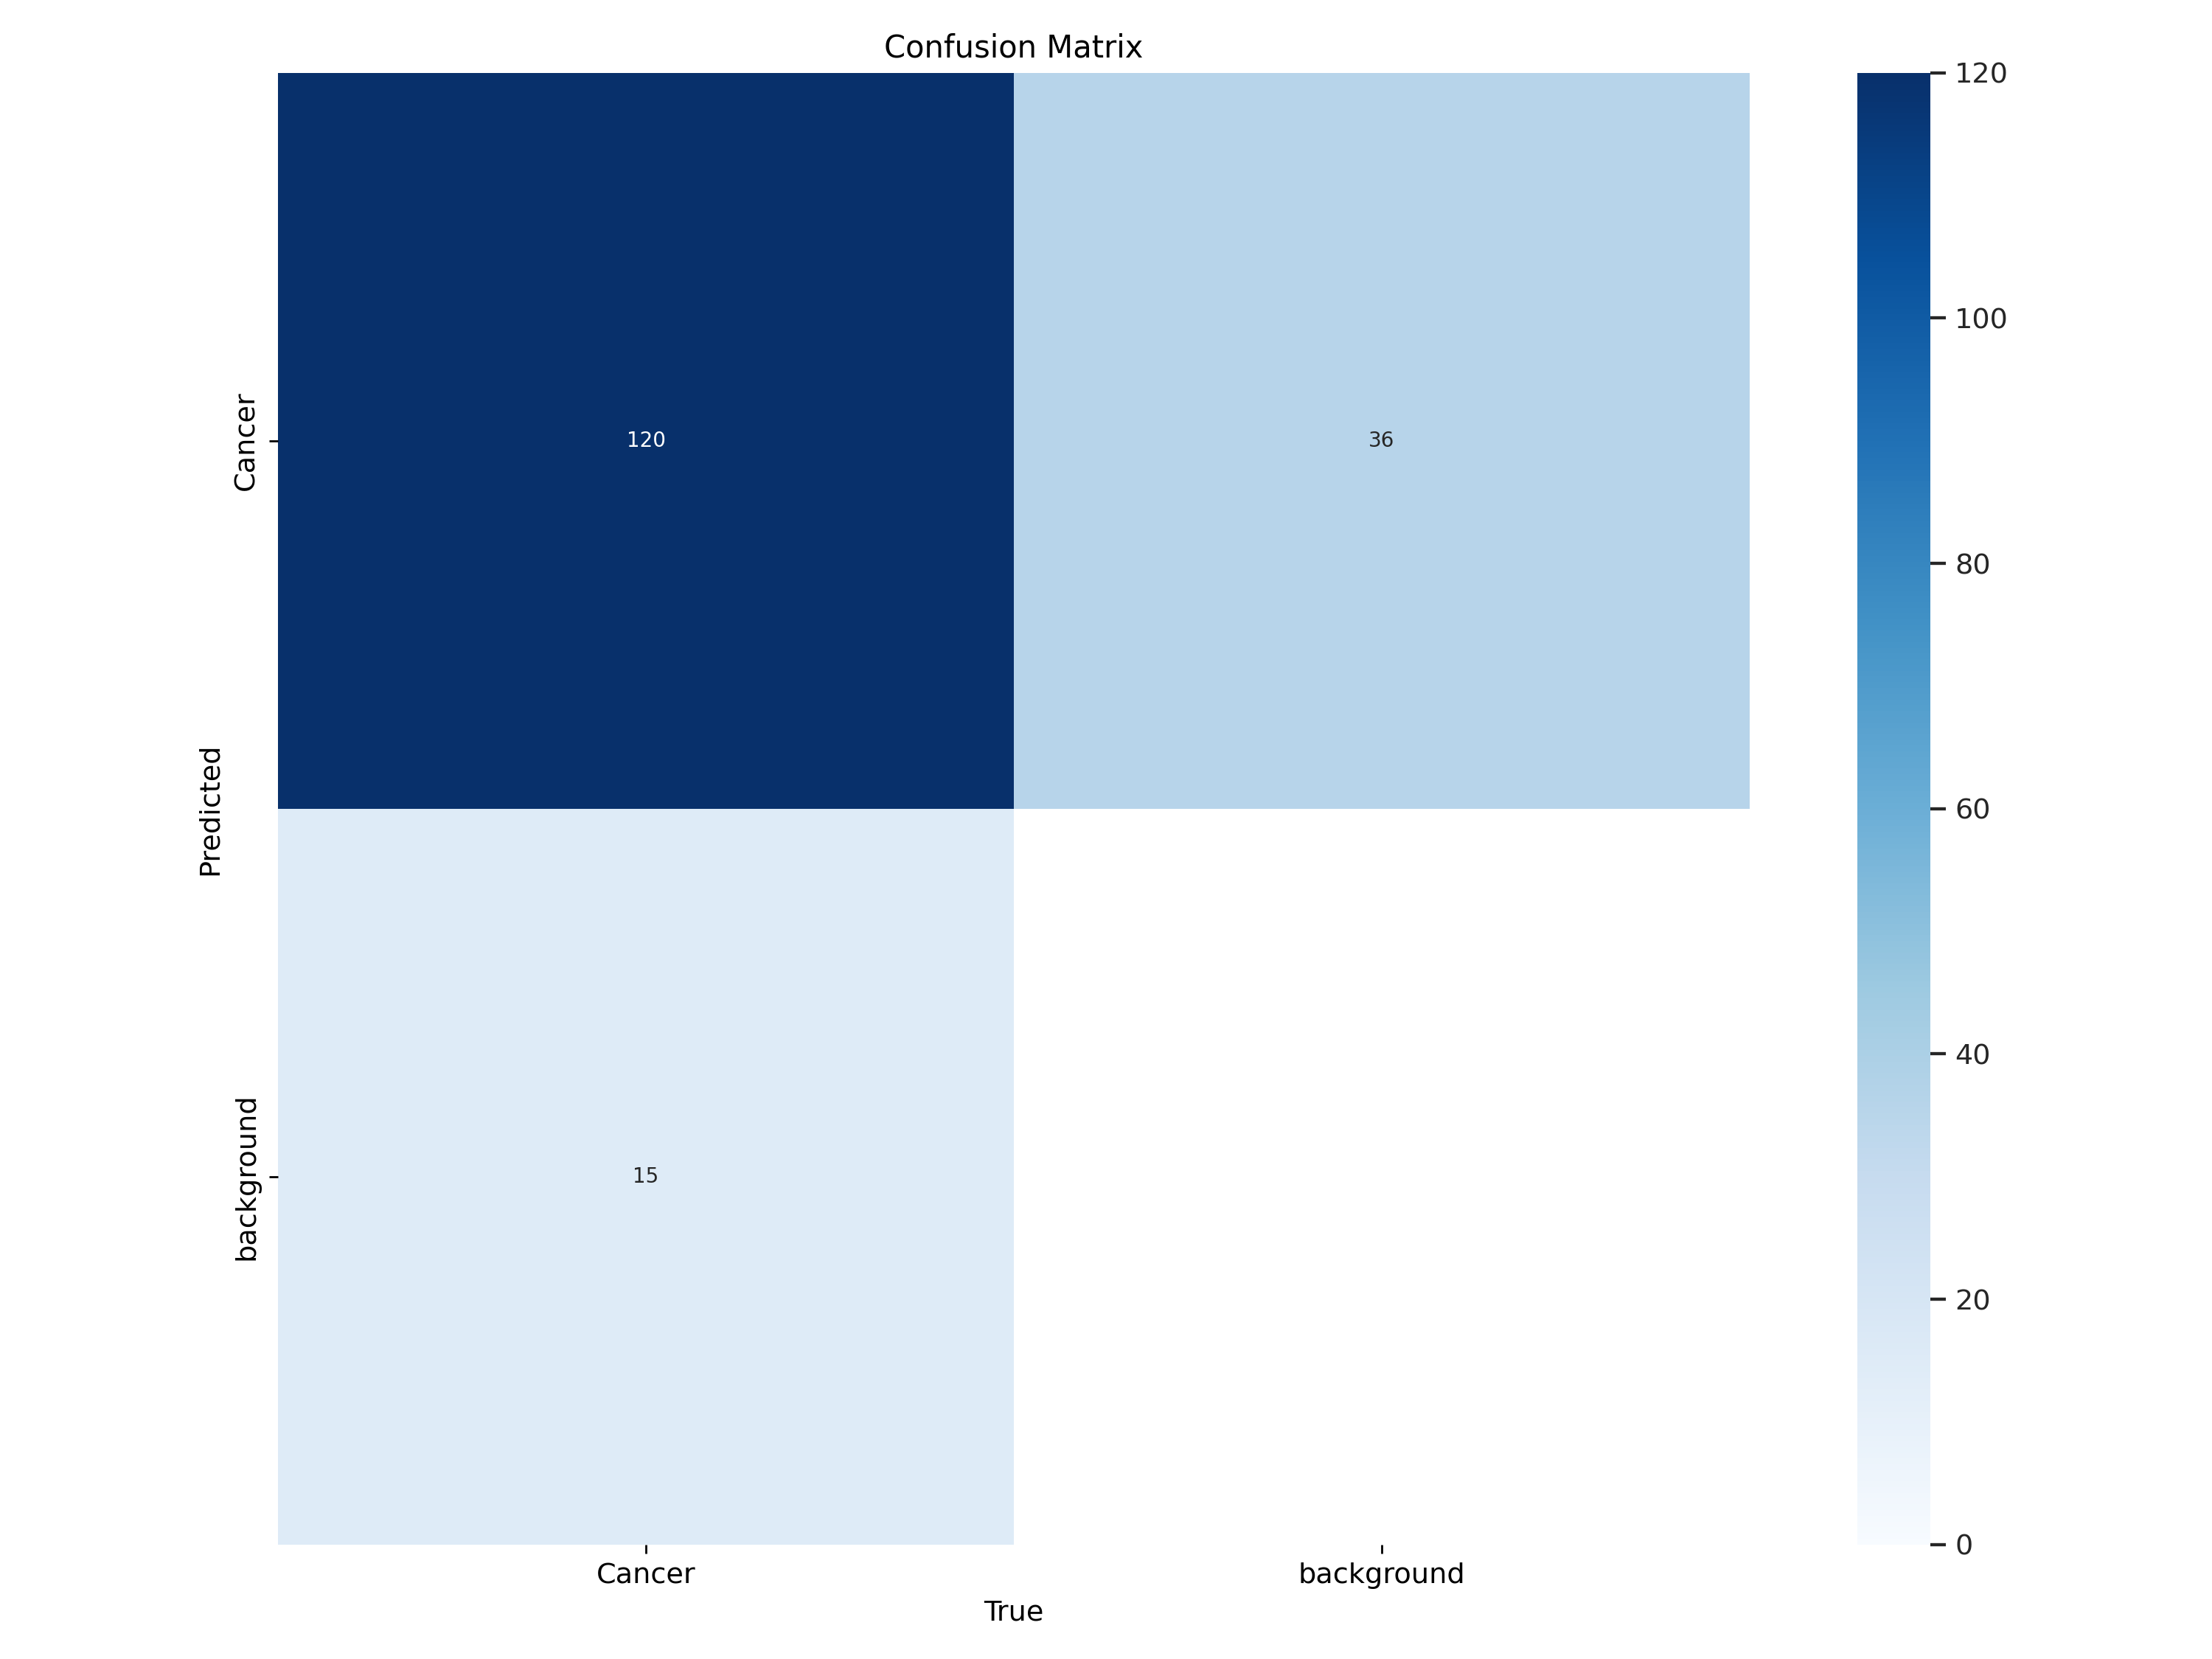

In [ ]:
from IPython.display import Image

# Display the image with reduced resolution
Image(filename='/content/drive/MyDrive/train/runs/segment/train7/confusion_matrix.png', width=600)

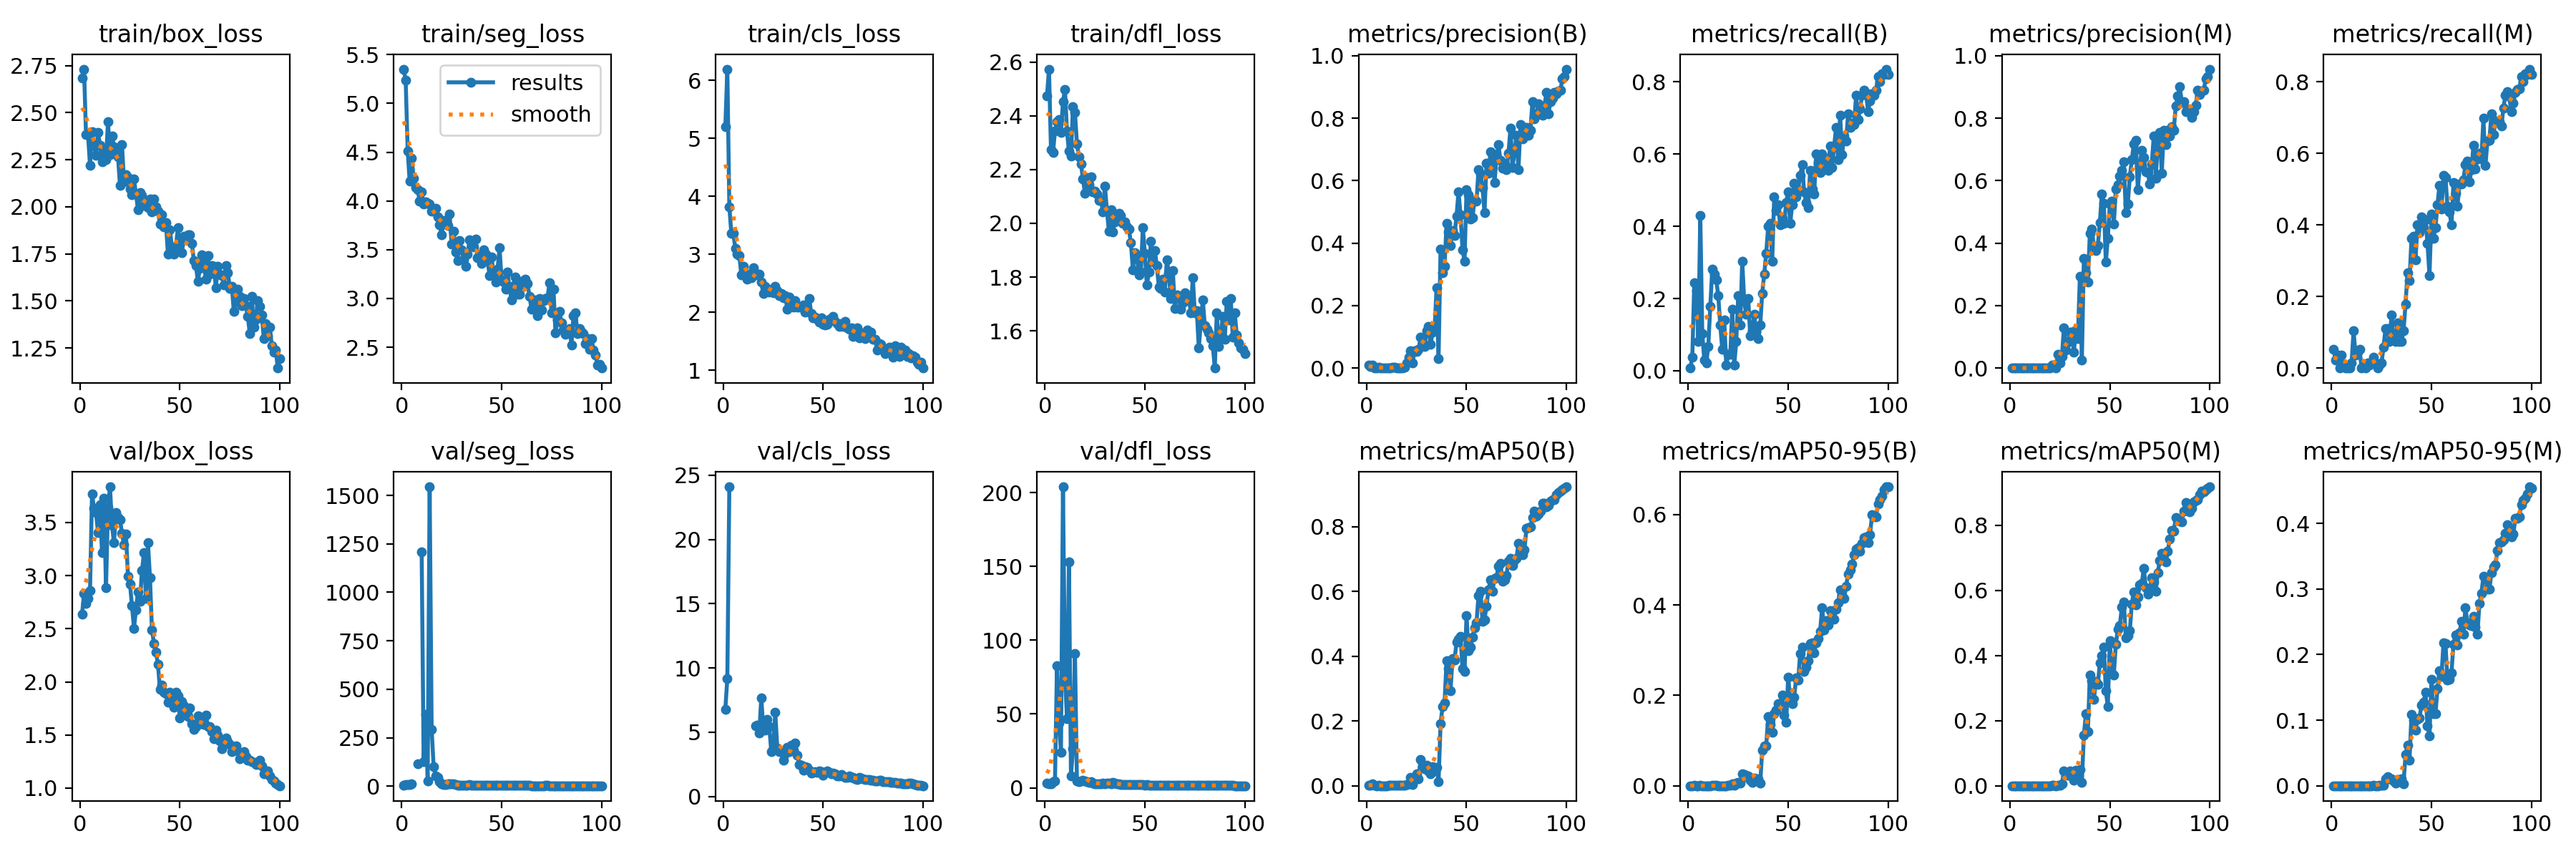

In [ ]:
Image(filename='/content/drive/MyDrive/train/runs/segment/train7/results.png', width=1000)

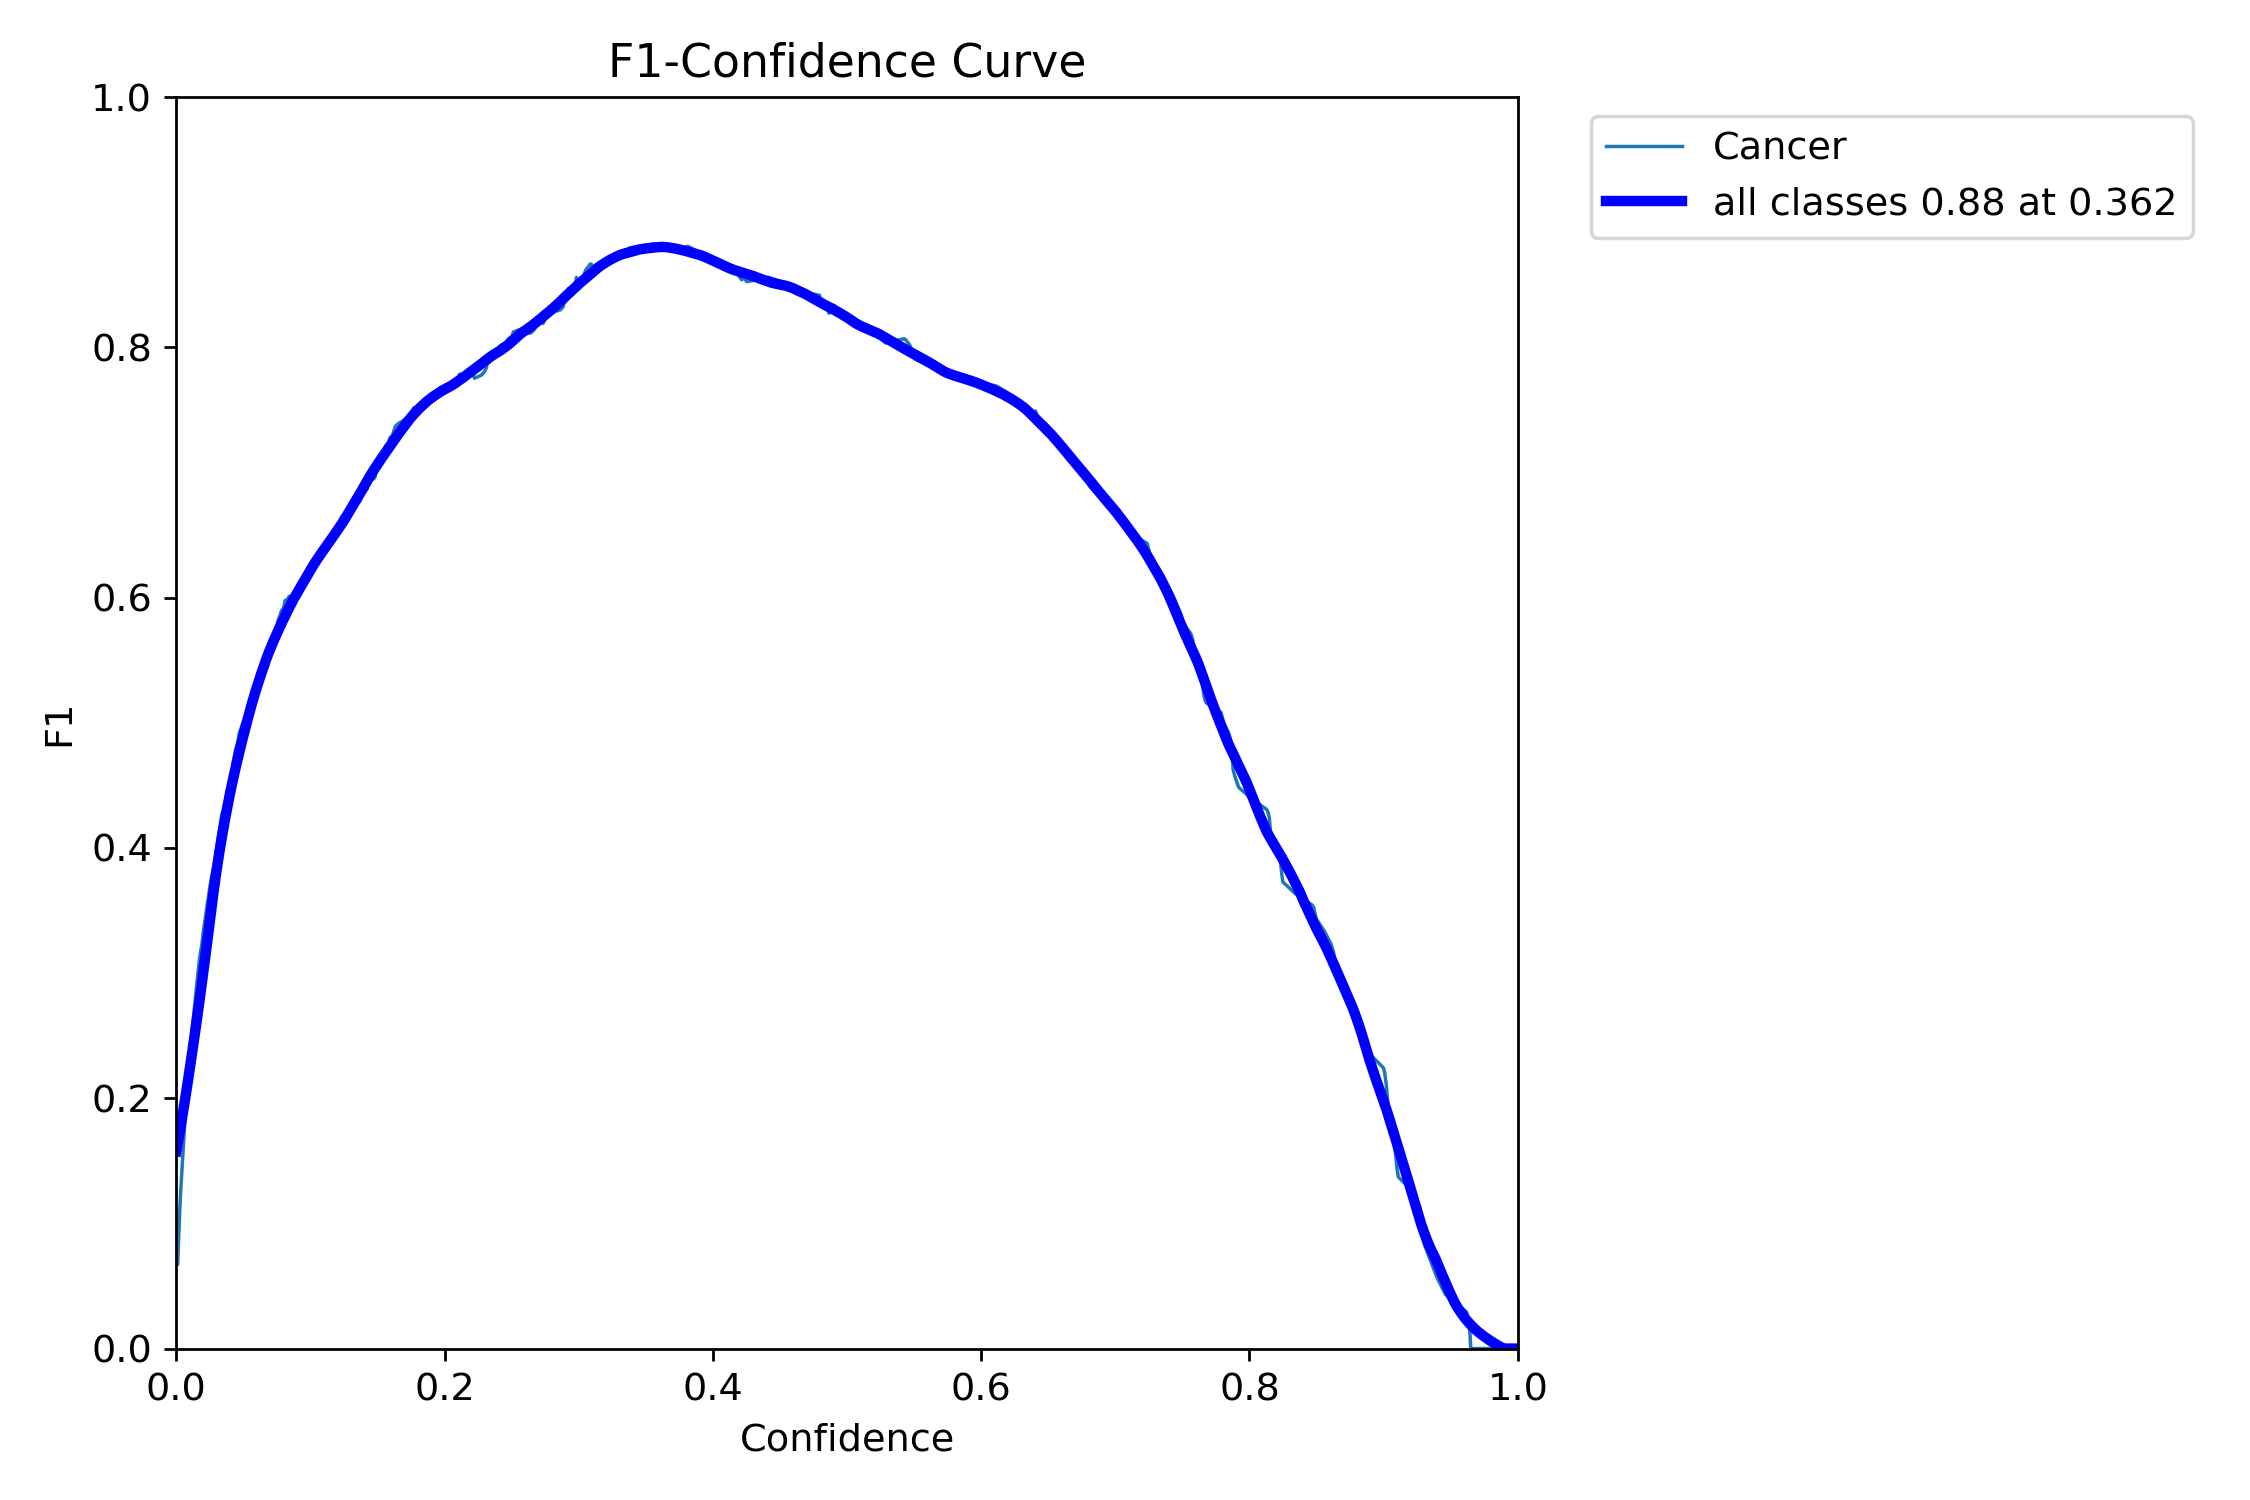

In [ ]:
Image(filename='/content/drive/MyDrive/train/runs/segment/train7/BoxF1_curve.png', width=500)

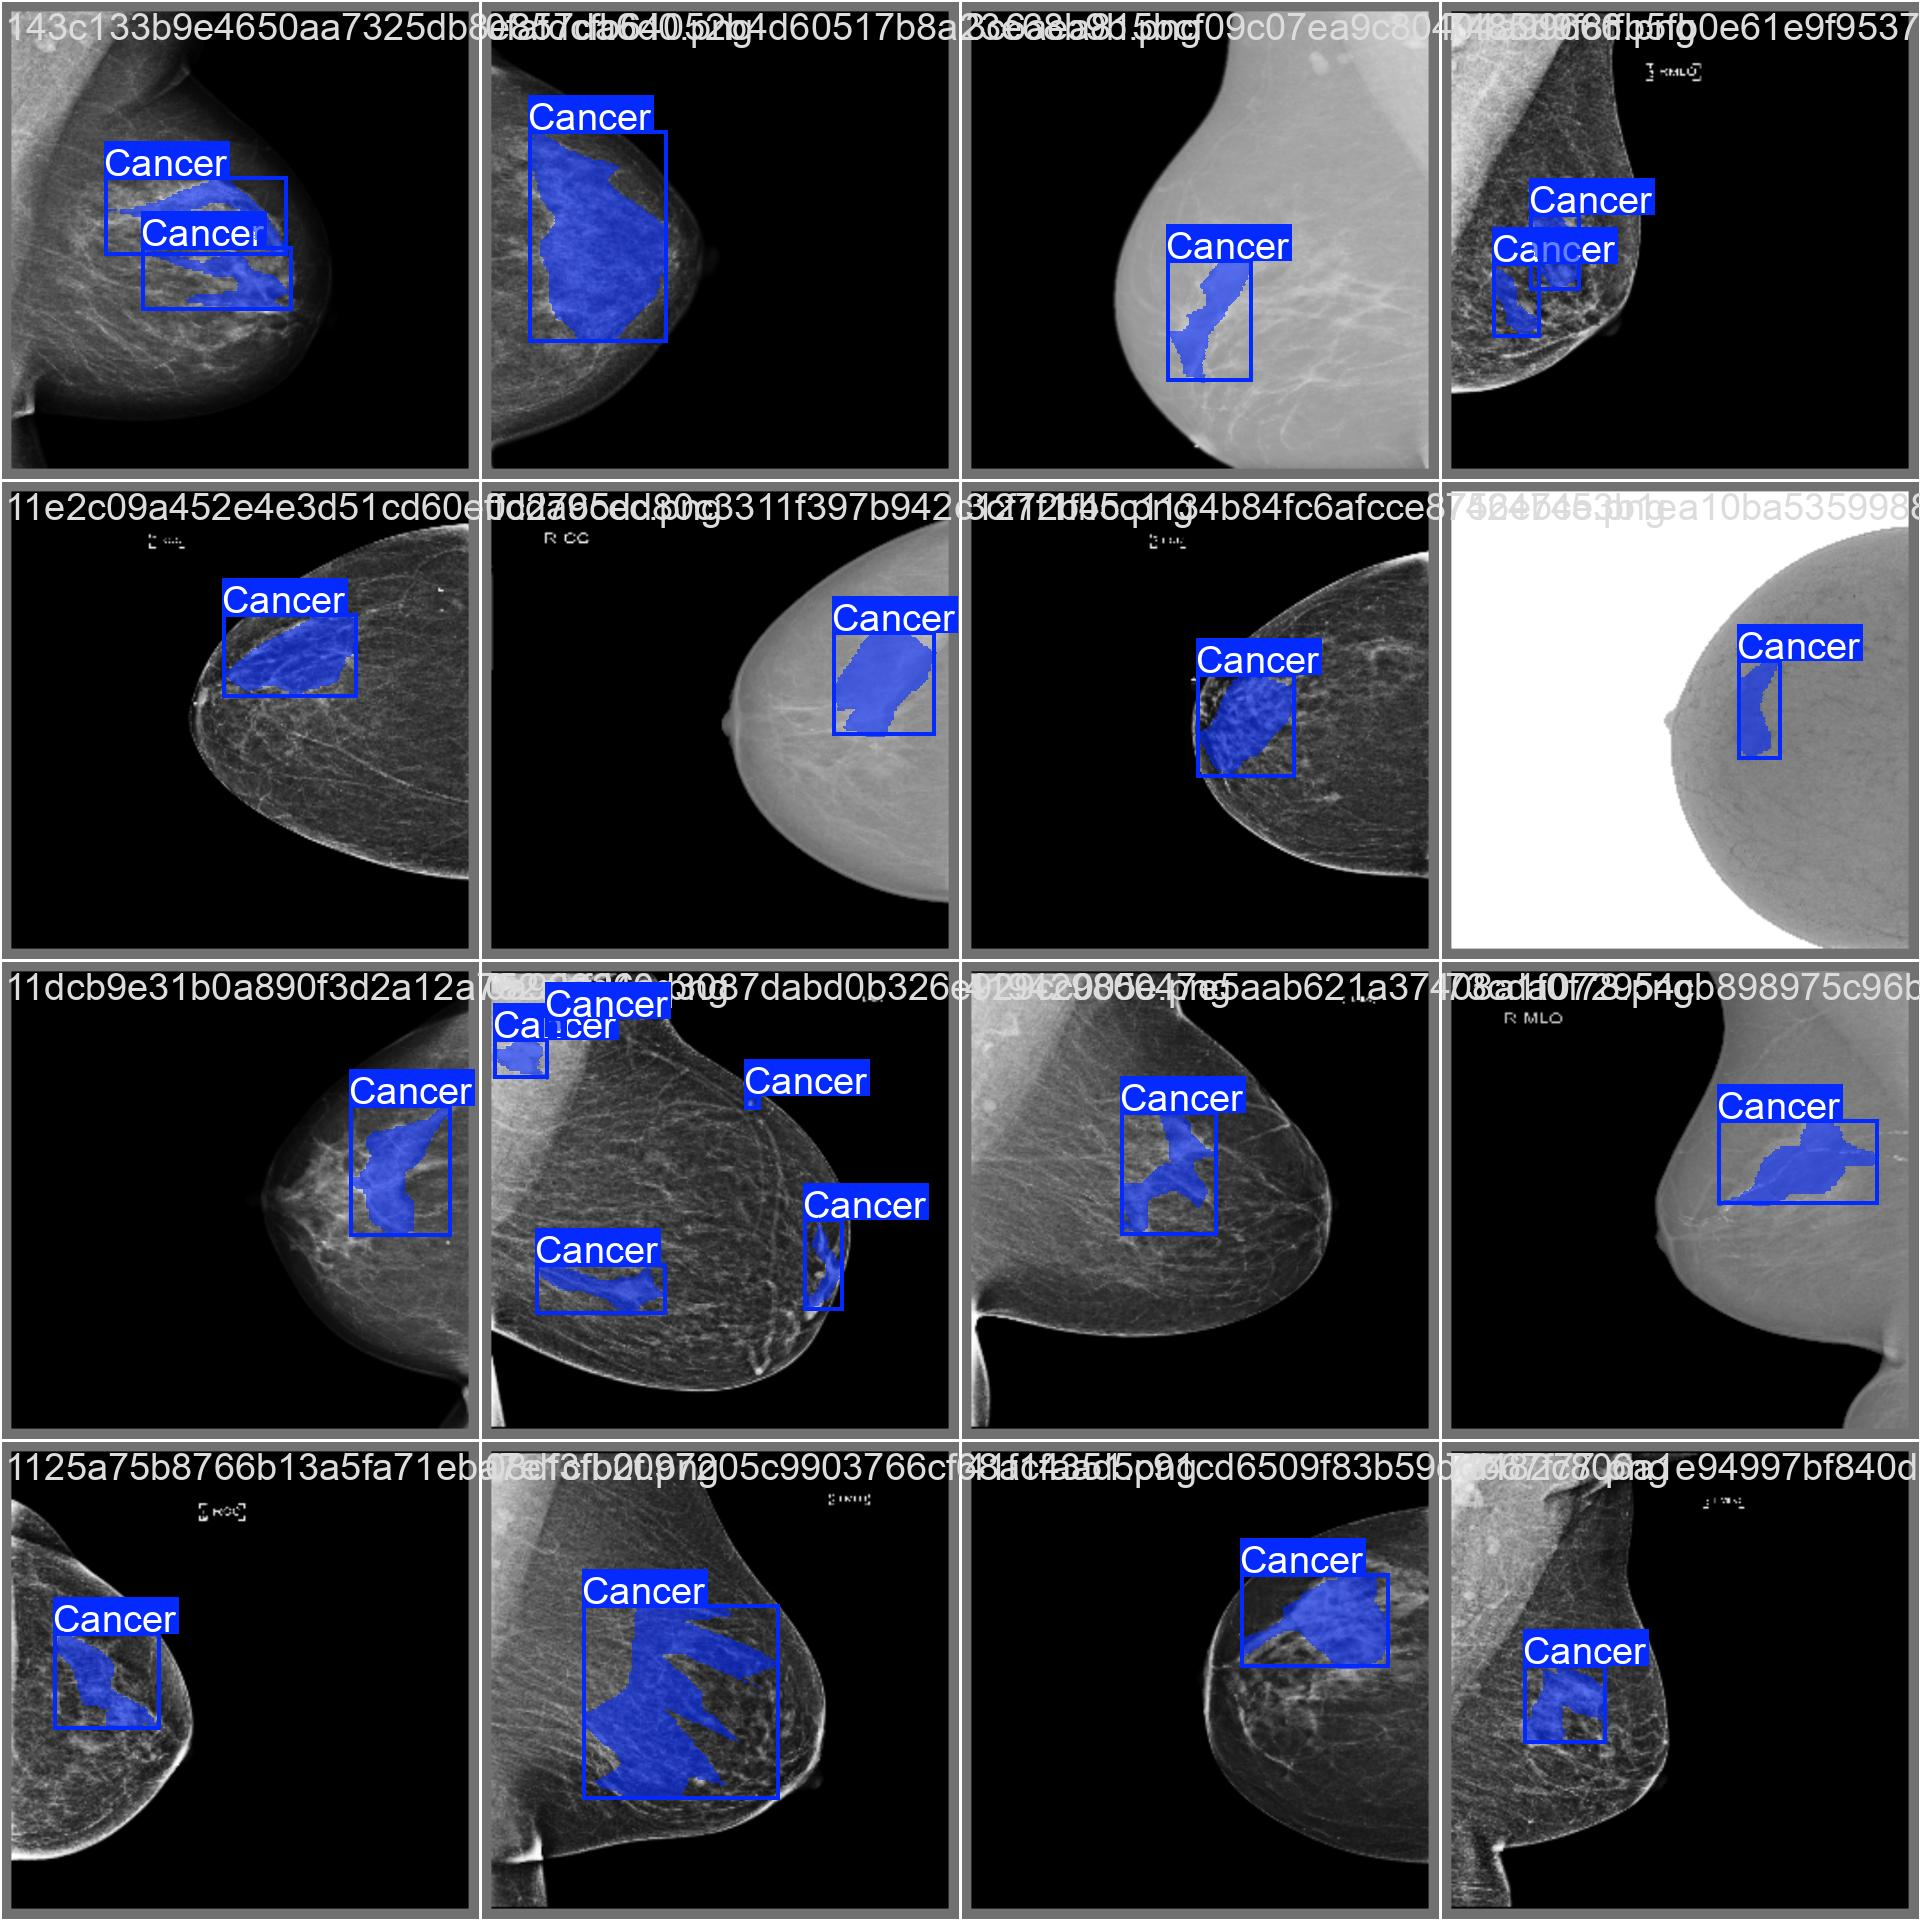

In [ ]:
Image(filename='/content/drive/MyDrive/train/runs/segment/train7/val_batch2_labels.jpg', width=500)

In [ ]:
model = YOLO('runs/segment/train7/weights/best.pt')

In [ ]:
model.predict(
    source='/content/drive/MyDrive/train/train/images/6e7da91e37d5c97b3cc8283591b6793d.png',
    show=True,
    save=True,
    hide_labels=False,
    conf=0.5,
    save_txt=False,
    save_crop=False,
    line_thickness=2,
)

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in in the future. Please use 'show_labels' instead.
WARNING ⚠️ 'line_thickness' is deprecated and will be removed in in the future. Please use 'line_width' instead.
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/drive/MyDrive/train/train/images/6e7da91e37d5c97b3cc8283591b6793d.png: 640x640 1 Cancer, 45.8ms
Speed: 4.9ms preprocess, 45.8ms inference, 624.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'Cancer'}
 obb: None
 orig_img: array([[[ 54,  54,  54],
         [ 51,  51,  51],
         [ 71,  71,  71],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[ 58,  58,  58],
         [ 70,  70,  70],
         [ 66,  66,  66],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[ 59,  59,  59],
         [ 57,  57,  57],
         [ 61,  61,  61],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[129, 129, 129],
         [137, 137, 137],
         [146, 146, 146],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[142, 142, 142],
         [141, 141, 141],
         [141, 141, 141

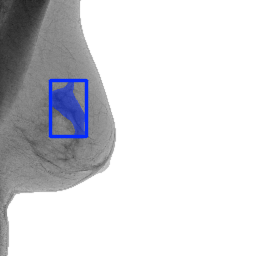

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/train/runs/segment/predict2/6e7da91e37d5c97b3cc8283591b6793d.png', width=500)